In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Funcions útils

In [2]:
def imprimeix_imatge(image):
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='Greys')
    plt.axis('off')
    plt.show()

def sigmoide(x):
    return 1/(1 + np.exp(-x))

def softmax(x):
    exp = np.exp(x - np.max(x))
    return exp / exp.sum(axis=0)

# derivada de relu
def d_sigmoide(x):
    return sigmoide(x) * (1-sigmoide(x))

### LLegir dades i processar-les

In [3]:
entrenament = pd.read_csv("train.csv").to_numpy()
prova = pd.read_csv("test.csv").to_numpy()
np.random.shuffle(entrenament)
entrenament

array([[4, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]], dtype=int64)

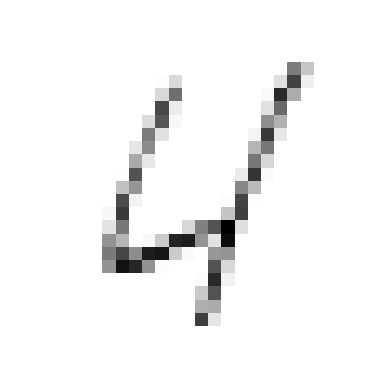

4

In [11]:
def processa_imatges(imatges):
    imatges = (imatges-np.min(imatges))/(np.max(imatges)-np.min(imatges))
    imatges = imatges.T
    return imatges

entrenament_digits = entrenament[:, 0]
entrenament_imatges = processa_imatges(entrenament[:, 1:])
prova_imatges = processa_imatges(prova)
imprimeix_imatge(entrenament_imatges.T[0])
entrenament_digits[0]

In [16]:
def valors_inicials(dimesnisons):
    W_l = []
    b_l = []
    for i in range(len(dimesnisons)-1):
        W_l.append(np.random.randn(dimesnisons[i+1], dimesnisons[i]))
    for dimenió in dimesnisons[1:]:
        b_l.append(np.random.randn(dimenió, 1))

    return W_l, b_l

In [31]:
def propaga(W_l, b_l, imatges):
    Z_l = []
    A_l = []
    # valor inicial depén de imatges i no de A_l
    Z_l.append(W_l[0].dot(imatges) + b_l[0])

    for i in range(1, len(W_l)):
        A_l.append(sigmoide(Z_l[i-1]))
        Z_l.append(W_l[i].dot(A_l[i - 1]) + b_l[i])
    
    A_l.append(softmax(Z_l[-1]))

    return Z_l, A_l
W_l, b_l = valors_inicials([784, 16, 10])
propaga(W_l, b_l, entrenament_imatges)


([array([[ -2.88766285,  -5.10462976,   5.20487309, ...,   1.6605802 ,
           -7.72402201, -11.09564002],
         [ -9.71232681,   0.24828819, -19.65057366, ...,  -8.15053511,
          -14.14062975,  -8.47583434],
         [  4.07307707,   2.97285866,  -8.8983859 , ...,  -2.89339732,
            7.14949747,   0.89729246],
         ...,
         [ -3.36653562,  -5.80902483, -24.44720137, ..., -12.06508316,
            7.07547742,  -8.78680695],
         [ -3.60859493,  -8.09414022,   0.60366557, ...,  -0.55515   ,
            0.14223506,   6.65155116],
         [ -2.42946513,   2.33800018,   8.60837678, ...,   6.02792596,
           13.62433388,  -0.09550175]]),
  array([[ 3.75953201,  2.57625092,  1.15836943, ..., -0.34846879,
           3.98219675,  3.27846513],
         [ 3.1202538 ,  1.96902865, -0.55211281, ...,  1.36846627,
           0.20890306,  2.11571347],
         [-1.16388219, -0.78861684,  1.34209903, ...,  1.06712175,
           2.52085086,  1.62301122],
         ...

In [33]:
def one_hot(digits):
    one_hot_digits = np.zeros((digits.shape[0], 10))
    for (digit, one_hot_vec) in zip(digits, one_hot_digits):
        one_hot_vec[digit] = 1
    return one_hot_digits.T

In [43]:
def retropropaga(Z_l, A_l, W_l, b_l, digits, imatges):
    tamany, m = imatges.shape
    delta_l = [None] * len(W_l)
    dW_l = [None] * len(W_l)
    db_l = [None] * len(b_l)

    delta_l[-1] = 2*(A_l[-1] - one_hot(digits))

    for i in range(len(W_l) - 1, 0, -1): # desde (len(W_l) -1) (inclusiu) fins 0 (exclusiu)
        dW_l[i] = 1/m * (delta_l[i].dot(A_l[i - 1].T))
        db_l[i] = 1/m * (np.sum(delta_l[i], 1))

        delta_l[i - 1] = W_l[i].T.dot(delta_l[i]) * d_sigmoide(Z_l[i - 1])
    
    dW_l[0] = 1/m * (delta_l[0].dot(imatges.T))
    db_l[0] = 1/m * (np.sum(delta_l[0], 1))

    return dW_l, db_l

W_l, b_l = valors_inicials([784, 16, 10])
Z_l, A_l = propaga(W_l, b_l, entrenament_imatges)
retropropaga(Z_l, A_l, W_l, b_l, entrenament_digits, entrenament_imatges)

([array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[-7.84608831e-02,  1.34975250e-02, -6.32600206e-03,
          -1.14021718e-01, -6.97301360e-02, -1.15084690e-01,
          -7.14783251e-03, -1.16501856e-01,  1.55243175e-03,
          -1.02767191e-01, -1.43450003e-01, -7.91450202e-02,
          -1.05323981e-01, -1.11326465e-01, -2.33448648e-02,
          -1.26808376e-01],
         [-1.90636914e-01, -1.39196288e-01, -4.73616150e-03,
          -1.38586786e-01, -7.64029814e-03, -5.21658358e-02,
          -3.91590081e-02, -1.44330080e-01, -2.09960274e-01,
          -2.26417092e-02, -1.10055651e-01, -1.01631817e-01,
          -2.04631308e-01, -1.28819296e-01, -8.55966188e-02,
          -2.01899354e-01],
         [-1.47521473e-01, -3.07166238e-02, -7.87076881e-03,
          -1.1832

In [49]:
def actualitza_paràmetres(W_l, b_l, dW_l, db_l, alfa):
    W_l = [ W - dW * alfa for (W, dW) in zip(W_l, dW_l) ]
    b_l = [ b - np.reshape(db, b.shape) * alfa for (b, db) in zip(b_l, db_l) ]

    return W_l, b_l

W_l, b_l = valors_inicials([784, 16, 10])
Z_l, A_l = propaga(W_l, b_l, entrenament_imatges)
dW_l, db_l = retropropaga(Z_l, A_l, W_l, b_l, entrenament_digits, entrenament_imatges)
actualitza_paràmetres(W_l, b_l, dW_l, db_l, 0.1)

([array([[ 1.13682166,  0.19495093, -1.50270072, ...,  1.79219828,
           0.53595962, -0.81410941],
         [-0.53685879, -0.91221462,  0.84201056, ...,  0.97548302,
          -1.09679479,  0.50927646],
         [ 0.50427793, -0.29250935,  0.90841808, ..., -0.51792096,
          -0.83525951, -0.25538622],
         ...,
         [-1.34048947,  2.0727474 ,  1.36418382, ..., -0.23798971,
           0.73440256,  2.83380986],
         [ 1.49422351, -1.29250535,  2.34655912, ...,  0.25077876,
           0.53272694, -1.14844243],
         [ 1.15532978,  1.50939699,  0.61429489, ..., -0.54896814,
          -0.16595548,  0.55206375]]),
  array([[ 0.13278469,  0.76173717,  1.04876164, -0.36498918,  0.60612984,
          -0.18603331, -0.27165196, -0.19986834,  0.4514221 ,  1.09471384,
           2.6425137 ,  0.05877807, -0.58516323,  0.94694565, -1.41726168,
          -1.31588338],
         [-0.090131  , -1.46241227,  0.67792089,  0.04375378,  1.70960282,
           1.39666841,  0.35525364, 

In [50]:
precisió = 0
alfa = 0.15
iter = 0
W_l, b_l = valors_inicials([784, 16, 10])
while alfa < 0.9:
    iter += 1

    Z_l, A_l = propaga(W_l, b_l, entrenament_imatges)
    dW_l, db_l = retropropaga(Z_l, A_l, W_l, b_l, entrenament_digits, entrenament_imatges)

    W_l, b_l = actualitza_paràmetres(W_l, b_l, dW_l, db_l, alfa)

    precisió = np.sum(np.argmax(A_l[-1], 0) == entrenament_digits)/entrenament_digits.size
    if (iter % 10 == 0):
        print(f"Iteració: {iter}, precisió: {precisió*100:.2f}%", end="\r")

KeyboardInterrupt: 

In [1]:
_, _, _, a2 = propaga(prova_imatges)
imprimeix_imatge(prova_imatges.T[8])
print(np.argmax(a2, 0)[8])

NameError: name 'propaga' is not defined